## MO431A - Tarefa 1
### Nome: chm10

## Código para entender SVD (Decomposição em valores singulares)
Função: $M = S \sum D^{*}$

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy 

### Leia o arquivo X.npy

In [2]:
X = np.load("X.npy")

### Imprima a imagem da primeira pessoa.

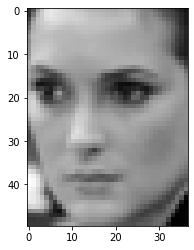

In [3]:
plt.imshow(X[0].reshape((50,37)),cmap='gray')
plt.show()

### Faça a fatoração svd da matriz X.

In [4]:
u, s, vh = np.linalg.svd(a=X,full_matrices=True)
S = np.zeros((3023, 1850), dtype=float) # preenchendo com zero
S[:1850, :1850]  = np.diag(s)

In [5]:
print(f'Umxm = U{u.shape}')
# Foram adicionadas 1173 linhas  de zeros na matriz diagonal para representar 
# matriz D com dimensão mxn full matrix = True
print(f'Dmxn = D{S.shape}')
print(f'VHnxn = VH{vh.shape}')

Umxm = U(3023, 3023)
Dmxn = D(3023, 1850)
VHnxn = VH(1850, 1850)


In [6]:
u_compact, s_compact, vh_compact = np.linalg.svd(a=X,full_matrices=False)

In [7]:
print(f'Umxm = U{u_compact.shape}')
## Foi utilizado np.diag para reconstruir vetor em matriz diagonal nxn
print(f'Dmxn = D{np.diag(s_compact).shape}')
print(f'VHnxn =VH{vh_compact.shape}')

Umxm = U(3023, 1850)
Dmxn = D(1850, 1850)
VHnxn =VH(1850, 1850)


### Verifique a formulação compacta do SVD

In [8]:
erro = (X - np.dot(u_compact,np.dot(np.diag(s_compact),vh_compact)))

In [9]:
print(f"O erro absoluto máximo é igual {np.abs(erro).max()}")
print(f"O erro médio é igual {np.abs(erro).mean()}")
print(f"A escala do erro máximo com relação ao valor médio de X é de {np.abs(erro).max()/np.abs(X).mean()} vezes maior")

O erro absoluto máximo é igual 0.0003814697265625
O erro médio é igual 3.810965790762566e-05
A escala do erro máximo com relação ao valor médio de X é de 2.9446016469591996e-06 vezes maior


#### Erro máximo representa uma escala pequena de 10e-6 maior que a média dos erros.

### Compute a matriz reduzida e a matriz reconstruída TruncatedSVD K = 100

In [28]:
from sklearn.decomposition import TruncatedSVD

In [29]:
# Definindo configuração k = 100
svd = TruncatedSVD(n_components=100, random_state=42)

In [30]:
svd.fit(X)

TruncatedSVD(algorithm='randomized', n_components=100, n_iter=5,
             random_state=42, tol=0.0)

In [31]:
print(svd.explained_variance_ratio_.sum())

0.9186262


#### Matriz reduzida

In [32]:
X_transformed = svd.transform(X)
print(f'Os primeiros 5 elementos da matriz reduzida truncada {X_transformed[:5,5]}')

Os primeiros 5 elementos da matriz reduzida truncada [ -99.880325 -398.19696  -443.30417     5.479889  331.08853 ]


#### Matriz reconstruída

In [33]:
X_recovery = np.dot(X_transformed,svd.components_)
print(f'X_recuperado = {X_recovery.shape}')

X_recuperado = (3023, 1850)


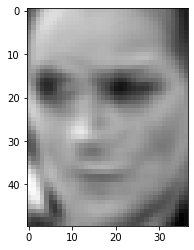

In [34]:
plt.imshow(X_recovery[0].reshape((50,37)),cmap='gray')
plt.show()

### Compute a matriz reduzida e a matriz reconstruída SVD full matrix


In [35]:
matrix_full = np.dot(u,S)
print(f'Os primeiros 5 elementos da matriz reduzida cheia  {matrix_full[:5,5]}')
X_recovery2 = np.dot(u, np.dot(S, vh))
print(f'X_reduzido = {matrix_full.shape}')
print(f'X_recuperado = {X_recovery2.shape}')

Os primeiros 5 elementos da matriz reduzida cheia  [  99.88061058  398.19671086  443.30393167   -5.48025784 -331.08867464]
X_reduzido = (3023, 1850)
X_recuperado = (3023, 1850)


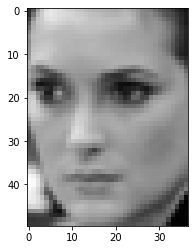

In [36]:
plt.imshow(X_recovery2[0].reshape((50,37)),cmap='gray')
plt.show()

### Compute a matriz reduzida e a matriz reconstruída SVD full matrix transformando para truncated manualmente com k = 100

In [37]:
matrix_full_to_truncated = np.dot(u[:3023, :100],np.diag(s[  :100]))
print(f'Os primeiros 5 elementos da matriz reduzida  trucada usando SVD com k = 100 {matrix_full_to_truncated[:5,5]}')
X_recovery3 = np.dot(u[:3023, :100],np.dot(np.diag(s[ :100]), vh[:100, :1850])) 
print(f'X_reduzido = {matrix_full_to_truncated.shape}')
print(f'X_recuperado = {X_recovery3.shape}')

Os primeiros 5 elementos da matriz reduzida  trucada usando SVD com k = 100 [  99.88061   398.19672   443.30392    -5.480258 -331.08868 ]
X_reduzido = (3023, 100)
X_recuperado = (3023, 1850)


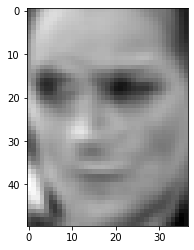

In [38]:
plt.imshow(X_recovery3[0].reshape((50,37)),cmap='gray')
plt.show()

### Compute a matriz reduzida e a matriz reconstruída SVD Compact

In [39]:
matrix_compact = np.dot(u_compact,np.diag(s_compact))
print(f'Os primeiros 5 elementos da matriz reduzida compacta {matrix_compact[:5,5]}')
X_recovery4 = np.dot(u_compact,np.dot(np.diag(s_compact),vh_compact))
print(f'X_reduzido = {matrix_compact.shape}')
print(f'X_recuperado = {X_recovery4.shape}')

Os primeiros 5 elementos da matriz reduzida compacta [  99.88061   398.19672   443.30392    -5.480258 -331.08868 ]
X_reduzido = (3023, 1850)
X_recuperado = (3023, 1850)


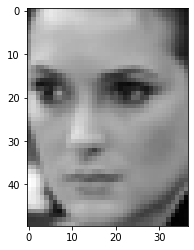

In [40]:
plt.imshow(X_recovery4[0].reshape((50,37)),cmap='gray')
plt.show()

### Compute a matriz reduzida e a matriz reconstruída SVD compact transformando para truncated manualmente com k = 100

In [41]:
matrix_compact_to_truncated = np.dot(u_compact[:3023, :100],np.diag(s_compact[  :100]))
print(f'Os primeiros 5 elementos da matriz reduzida compacta  usando SVD com k = 100 {matrix_compact_to_truncated[:5,5]}')
X_recovery5 = np.dot(u_compact[:3023, :100],np.dot(np.diag(s_compact[ :100]), vh_compact[:100, :1850]))
print(f'X_reduzido = {matrix_compact_to_truncated.shape}')
print(f'X_recuperado = {X_recovery5.shape}')

Os primeiros 5 elementos da matriz reduzida compacta  usando SVD com k = 100 [  99.88061   398.19672   443.30392    -5.480258 -331.08868 ]
X_reduzido = (3023, 100)
X_recuperado = (3023, 1850)


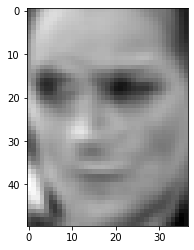

In [42]:
plt.imshow(X_recovery5[0].reshape((50,37)),cmap='gray')
plt.show()